# Predicting vibrational thermodynamics

The vibrational entropy, enthalpy, free energy and specific heat will be predicted for a series of 5 semiconductors from the Materials Project with following MP IDs: mp-14363, mp-988, mp-38487, mp-559200, mp-4661.

The predicted results will be compared with DFPT computes values.

In [1]:
import sys
from modnet.models import MODNetModel
from modnet.preprocessing import MODData

## Load the model

In [2]:
model = MODNetModel.load('../pretrained/vib_thermo')

2021-02-24 14:28:06,716 - modnet - INFO - Loading model from ../pretrained/vib_thermo(.json/.h5/.pkl)
2021-02-24 14:28:16,072 - modnet - INFO - Loaded `MODNetModel` created with modnet version <=0.1.7.


## Create MODData
In order to predict the thermodynamics for the above mentioned compounds, a MODData object should be constructed.
In order to do so, 2 steps are required: (i) creation of a MODData object with structures and optionally MP IDs and (ii) featurization by invoking the featurize() method. The structures were querried from the MP Rester API.

In [3]:
import pandas as pd
df = pd.read_pickle('data/df_thermo_new.pkl')
df['natoms'] = [8,7,14,7,3]
df

,S_5,C_v_5,H_5,U_5,S_10,C_v_10,H_10,U_10,S_15,C_v_15,...,S_795,C_v_795,H_795,U_795,S_800,C_v_800,H_800,U_800,structure,natoms
mpid,,,,,,,,,,,,,,,,,,,,,
mp-14363,0.067759,0.184558,44640.858776,44641.197571,0.510782,1.598688,44639.666826,44644.774648,1.851030,5.816376,...,397.932788,191.287141,-150822.136540,165534.430121,399.132385,191.382787,-152814.802357,166491.105621,"[[2.95548257 3.55797307 6.16204009] Li, [-2.75...",8
mp-988,0.000816,0.002201,76480.626713,76480.630796,0.005959,0.017763,76480.612556,76480.672142,0.020339,0.062582,...,190.422922,155.472010,3818.459910,155204.682561,191.398340,155.685076,2863.904765,155982.576707,[[-3.83015362e-08 4.42268046e+00 2.19381365e...,7
mp-38487,0.010251,0.028806,94613.562074,94613.613327,0.078558,0.243478,94613.378387,94614.163963,0.289885,0.962458,...,533.484081,333.824974,-133920.323566,290199.520483,535.577611,334.008769,-136592.982785,291869.106202,"[[2.71706522 4.78580228 0.14490763] Bi, [4.166...",14
mp-559200,0.043918,0.128862,23112.007674,23112.227262,0.435440,1.571841,23111.082564,23115.436964,1.803626,5.936110,...,397.799147,172.601972,-175838.460038,140411.861918,398.881372,172.626619,-177830.164099,141274.933585,"[[1.12562421 0.79593658 1.94963847] Cd, [ 7.87...",7
mp-4661,0.001324,0.003626,18498.425405,18498.432027,0.009466,0.027762,18498.402684,18498.497344,0.032300,0.101796,...,119.882667,72.061483,-33559.117964,61747.602004,120.334569,72.094710,-34159.662146,62107.992733,"[[ 1.3165874 2.79452082 -0.41493591] O, [3.9...",3


In [4]:
md = MODData(df['structure'],
             structure_ids = df.index
            )


If you use the ChemEnv tool for your research, please consider citing the following reference(s) :
David Waroquiers, Xavier Gonze, Gian-Marco Rignanese, Cathrin Welker-Nieuwoudt, Frank Rosowski,
Michael Goebel, Stephan Schenk, Peter Degelmann, Rute Andre, Robert Glaum, and Geoffroy Hautier,
"Statistical analysis of coordination environments in oxides",
Chem. Mater., 2017, 29 (19), pp 8346-8360,
DOI: 10.1021/acs.chemmater.7b02766

2021-02-24 14:28:16,406 - modnet - INFO - Loaded DeBreuck2020Featurizer featurizer.


#### Here we featurize using the database. At the end of this notebook a second option is given without using the database. 

In [5]:
md.featurize(fast=True,
             db_file='../modnet/data/feature_database.pkl'
            )

2021-02-24 14:28:16,412 - modnet - INFO - Computing features, this can take time...
2021-02-24 14:28:16,413 - modnet - INFO - Fast featurization on, retrieving from database...
2021-02-24 14:28:20,102 - modnet - INFO - Retrieved features for 5 out of 5 materials
2021-02-24 14:28:20,500 - modnet - INFO - Data has successfully been featurized!


## Predict

In [6]:
df_predictions = model.predict(md)

In [7]:
df_predictions.head()

,S_5_atom,S_10_atom,S_15_atom,S_20_atom,S_25_atom,S_30_atom,S_35_atom,S_40_atom,S_45_atom,S_50_atom,...,H_760_atom,H_765_atom,H_770_atom,H_775_atom,H_780_atom,H_785_atom,H_790_atom,H_795_atom,H_800_atom,eform
mp-14363,0.014347,0.018734,0.238954,0.606634,1.057049,1.684448,2.379784,3.057159,3.625864,4.372535,...,-17274.916016,-17516.820312,-17742.035156,-17984.978516,-18219.955078,-18462.693359,-18669.978516,-18922.746094,-19187.947266,-1.895996
mp-988,-0.010973,-0.001627,-0.016520,0.028203,0.086789,0.061554,0.071316,0.221528,0.156996,0.339230,...,714.511047,561.200562,504.741852,382.601746,291.089142,157.871490,112.379631,-7.474174,-194.458313,-0.710409
mp-38487,-0.008141,0.007511,0.027280,0.079071,0.160426,0.249019,0.380474,0.536368,0.630777,0.908211,...,-8083.064453,-8281.423828,-8404.014648,-8546.526367,-8694.868164,-8875.536133,-9001.016602,-9178.028320,-9363.007812,-2.205507
mp-559200,-0.010615,0.036975,0.161285,0.393592,0.742751,1.148751,1.614309,2.131572,2.705519,3.401336,...,-21751.392578,-22014.144531,-22267.328125,-22514.515625,-22766.244141,-23032.716797,-23287.316406,-23562.757812,-23815.939453,-0.687132
mp-4661,0.002966,0.024075,0.082043,0.099225,0.067827,0.083071,0.112224,0.205507,0.260845,0.519051,...,-10469.830078,-10686.641602,-10830.547852,-10990.991211,-11161.797852,-11356.781250,-11511.146484,-11712.181641,-11910.938477,-3.540361


## Plot of the results, compared with DFPT

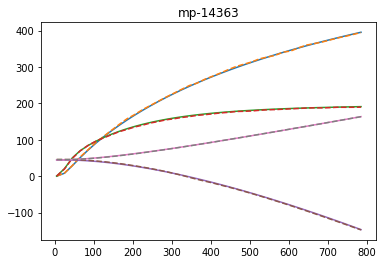

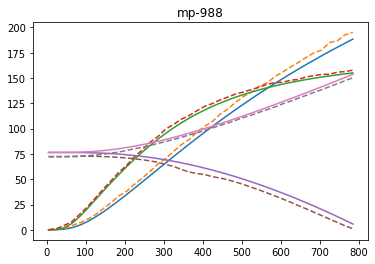

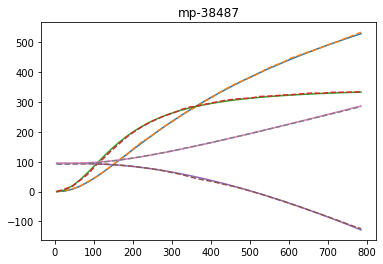

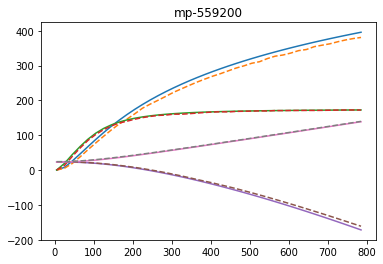

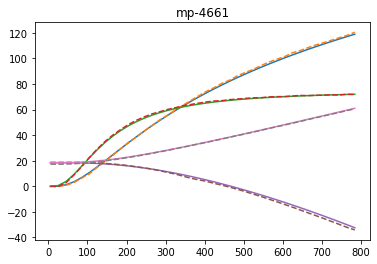

In [8]:
from matplotlib import pyplot as plt

for mpid in df_predictions.index:
    temp = range(5,801,20)
    S_true = df.loc[mpid,['S_{}'.format(T) for T in temp]].values
    S_pred = df_predictions.loc[mpid,['S_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']
    
    C_v_true = df.loc[mpid,['C_v_{}'.format(T) for T in temp]].values
    C_v_pred = df_predictions.loc[mpid,['C_v_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']
    
    H_true = df.loc[mpid,['H_{}'.format(T) for T in temp]].values/1000
    H_pred = df_predictions.loc[mpid,['H_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']/1000
    
    U_true = df.loc[mpid,['U_{}'.format(T) for T in temp]].values/1000
    U_pred = df_predictions.loc[mpid,['U_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']/1000
    
    fig,ax = plt.subplots()
    ax.set_title(mpid)
    ax.plot(temp,S_true)
    ax.plot(temp,S_pred,'--')
    
    ax.plot(temp,C_v_true)
    ax.plot(temp,C_v_pred,'--')
    
    ax.plot(temp,H_true)
    ax.plot(temp,H_pred,'--')
    
    ax.plot(temp,U_true)
    ax.plot(temp,U_pred,'--')

## Option 2: featurize on the fly without using the database

In [9]:
# Option 2: featurize on the fly, if you prefer not using the database
md2 = MODData(df['structure'],
              structure_ids = df.index
             )
md2.featurize(fast=False)

2021-02-24 14:28:31,232 - modnet - INFO - Loaded DeBreuck2020Featurizer featurizer.
2021-02-24 14:28:31,233 - modnet - INFO - Computing features, this can take time...
2021-02-24 14:28:31,234 - modnet - INFO - Applying composition featurizers...
2021-02-24 14:28:31,241 - modnet - INFO - Applying featurizers (AtomicOrbitals(), AtomicPackingEfficiency(), BandCenter(), ElementFraction(), ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x7fa329059d90>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats=['minimum', 'm


2021-02-24 14:28:37,752 - modnet - INFO - Applying oxidation state featurizers...



2021-02-24 14:28:41,757 - modnet - INFO - Applying featurizers (ElectronegativityDiff(stats=['minimum', 'maximum', 'range', 'mean', 'std_dev']), OxidationStates(stats=['minimum', 'maximum', 'range', 'std_dev'])) to column 'composition_oxid'.



2021-02-24 14:28:45,113 - modnet - INFO - Applying structure featurizers...


/Users/ppdebreuck/anaconda3/envs/modnet-develop/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


2021-02-24 14:28:45,340 - modnet - INFO - Applying featurizers (DensityFeatures(), GlobalSymmetryFeatures(), RadialDistributionFunction(), CoulombMatrix(), SineCoulombMatrix(), EwaldEnergy(), BondFractions(), StructuralHeterogeneity(), MaximumPackingEfficiency(), ChemicalOrdering(), XRDPowderPattern(pattern_length=128)) to column 'structure'.



2021-02-24 14:28:57,526 - modnet - INFO - Applying site featurizers...



2021-02-24 14:30:03,989 - modnet - INFO - Data has successfully been featurized!


In [10]:
# missing features:
missing_feats = []
for f in model.optimal_descriptors[:model.n_feat]:
    if f not in md2.df_featurized.columns:
        print(f)
        missing_feats.append(f)

BondFractions|Al - N bond frac.
BondFractions|B - Ca bond frac.
BondFractions|Be - Li bond frac.
BondFractions|Al - S bond frac.
BondFractions|B - Li bond frac.
BondFractions|Al - P bond frac.
BondFractions|Al - C bond frac.
BondFractions|Be - Ca bond frac.
BondFractions|Ca - P bond frac.
BondFractions|B - K bond frac.
BondFractions|B - P bond frac.
BondFractions|Al - Si bond frac.
BondFractions|B - Cr bond frac.
BondFractions|B - S bond frac.
BondFractions|C - Sc bond frac.
BondFractions|Cl - Ti bond frac.


These are bondfractions of non-appearing bonds in our test set. This is normal. We can safely set them to zero.

In [11]:
md2.df_featurized[missing_feats] = 0

## Predict

In [12]:
df_predictions = model.predict(md) # you can either use md or md2 here

In [13]:
df_predictions.head()

,S_5_atom,S_10_atom,S_15_atom,S_20_atom,S_25_atom,S_30_atom,S_35_atom,S_40_atom,S_45_atom,S_50_atom,...,H_760_atom,H_765_atom,H_770_atom,H_775_atom,H_780_atom,H_785_atom,H_790_atom,H_795_atom,H_800_atom,eform
mp-14363,0.014347,0.018734,0.238954,0.606634,1.057049,1.684448,2.379784,3.057159,3.625864,4.372535,...,-17274.916016,-17516.820312,-17742.035156,-17984.978516,-18219.955078,-18462.693359,-18669.978516,-18922.746094,-19187.947266,-1.895996
mp-988,-0.010973,-0.001627,-0.016520,0.028203,0.086789,0.061554,0.071316,0.221528,0.156996,0.339230,...,714.511047,561.200562,504.741852,382.601746,291.089142,157.871490,112.379631,-7.474174,-194.458313,-0.710409
mp-38487,-0.008141,0.007511,0.027280,0.079071,0.160426,0.249019,0.380474,0.536368,0.630777,0.908211,...,-8083.064453,-8281.423828,-8404.014648,-8546.526367,-8694.868164,-8875.536133,-9001.016602,-9178.028320,-9363.007812,-2.205507
mp-559200,-0.010615,0.036975,0.161285,0.393592,0.742751,1.148751,1.614309,2.131572,2.705519,3.401336,...,-21751.392578,-22014.144531,-22267.328125,-22514.515625,-22766.244141,-23032.716797,-23287.316406,-23562.757812,-23815.939453,-0.687132
mp-4661,0.002966,0.024075,0.082043,0.099225,0.067827,0.083071,0.112224,0.205507,0.260845,0.519051,...,-10469.830078,-10686.641602,-10830.547852,-10990.991211,-11161.797852,-11356.781250,-11511.146484,-11712.181641,-11910.938477,-3.540361


## Plot of the results, compared with DFPT

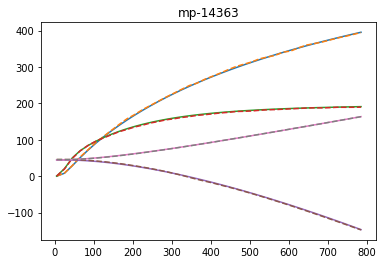

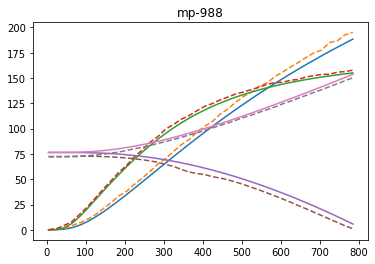

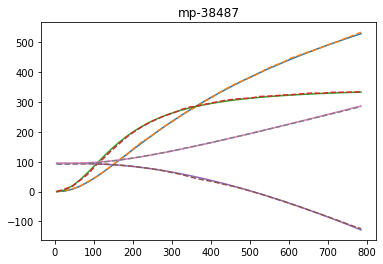

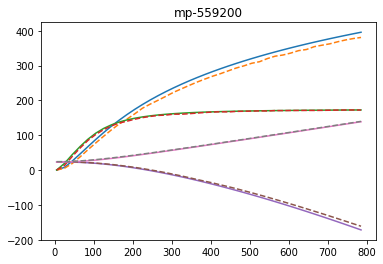

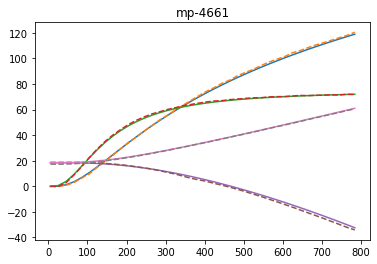

In [14]:
from matplotlib import pyplot as plt

for mpid in df_predictions.index:
    temp = range(5,801,20)
    S_true = df.loc[mpid,['S_{}'.format(T) for T in temp]].values
    S_pred = df_predictions.loc[mpid,['S_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']
    
    C_v_true = df.loc[mpid,['C_v_{}'.format(T) for T in temp]].values
    C_v_pred = df_predictions.loc[mpid,['C_v_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']
    
    H_true = df.loc[mpid,['H_{}'.format(T) for T in temp]].values/1000
    H_pred = df_predictions.loc[mpid,['H_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']/1000
    
    U_true = df.loc[mpid,['U_{}'.format(T) for T in temp]].values/1000
    U_pred = df_predictions.loc[mpid,['U_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']/1000
    
    fig,ax = plt.subplots()
    ax.set_title(mpid)
    ax.plot(temp,S_true)
    ax.plot(temp,S_pred,'--')
    
    ax.plot(temp,C_v_true)
    ax.plot(temp,C_v_pred,'--')
    
    ax.plot(temp,H_true)
    ax.plot(temp,H_pred,'--')
    
    ax.plot(temp,U_true)
    ax.plot(temp,U_pred,'--')